In [1]:
from scipy.io import wavfile
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift, ifft
from numpy import linalg as LA
from scipy.io.wavfile import write
import winsound
import wavio
from playsound import playsound

# Punto 2
## a)

Se encuentra que para que el sistema sea estable se debe cumplir

$$0 \leq \beta < 1$$

## b)
Se prueba el efecto del parámetro $\beta$ sobre un audio monoaural. 

In [2]:
samprate2, s2 = wavfile.read('monoAudio.wav')

s2 = s2/32767 # El formato de s es de un número entero de 16 bits, que tiene un rango entre -32768 a 32767.

length1 = s2.shape[0]/samprate2 # Duración en segundos
duration = int(length1) # Duración en segundos enteros

t = np.linspace(0, length1, s2.shape[0]) 

<ipython-input-2-609d661403ea>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samprate2, s2 = wavfile.read('monoAudio.wav')


Text(0.5, 1.0, 'Señal $y[n]$ en el dominio del tiempo con $\\beta$ = 1.1')

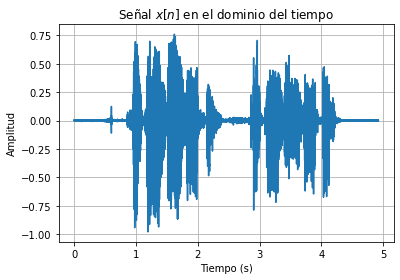

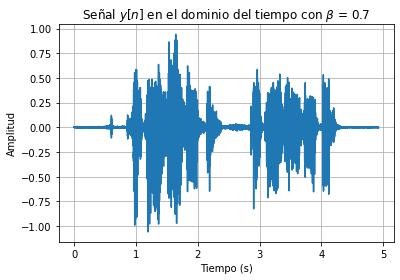

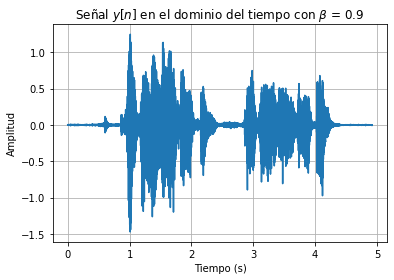

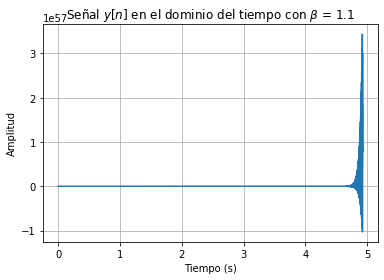

In [3]:
N1 = 150

b1 = 0.7
b2 = 0.9
b3 = 1.1

out1 = []
out2 = []
out3 = []


def y1(n, x, b, N):
    salida = 0
    if n < 0:
        salida = 0
    elif n == 0:
        salida = x[0]
    elif n > 0 and n < N:
        salida = x[n]
    elif n > N:
        salida = y2(n, s2, b, N)
        
    return salida

def y2(n, x, b, N):
    salida = 0
    if n > 0 and n > N:
        salida = x[n] + b*y1(n-N, s2, b, N)
    elif n == N:
        salida = x[n] + b*y1(0, s2, b, N)
    else:
        salida = y1(n, s2, b, N)
    
    return salida

for n in range(len(s2)):
    y_1 = y2(n, s2, b1, N1)
    y_2 = y2(n, s2, b2, N1)
    y_3 = y2(n, s2, b3, N1)
    out1.append(y_1)
    out2.append(y_2)
    out3.append(y_3)
    

plt.plot(t, s2)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title("Señal $x[n]$ en el dominio del tiempo")

plt.figure()
    
plt.plot(t, out1)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title("Señal $y[n]$ en el dominio del tiempo con " + r"$\beta$ = " + f"{b1}")

plt.figure()

plt.plot(t, out2)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title("Señal $y[n]$ en el dominio del tiempo con " + r"$\beta$ = " + f"{b2}")

plt.figure()

plt.plot(t, out3)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title("Señal $y[n]$ en el dominio del tiempo con " + r"$\beta$ = " + f"{b3}")

In [4]:
wavio.write("b1.wav", np.asarray(out1), samprate2, sampwidth=2)
wavio.write("b2.wav", np.asarray(out2), samprate2, sampwidth=2)
wavio.write("b3.wav", np.asarray(out3), samprate2, sampwidth=2)

In [5]:
playsound('monoAudio.wav')
playsound('b1.wav')
playsound('b2.wav')
playsound('b3.wav')

A medida que aumenta el valor de $\beta$ se vuleve más robótica la voz. De igual forma, se escucha con más eco. Para un $\beta > 1$, el sistema se vuelve inestable y se satura el audio.

## c)
Se analiza el efecto de $N$ sobre la salida $y[n]$. Se usa $\beta_1 = 0.7$ para realizar las pruebas.

Text(0.5, 1.0, 'Señal $y[n]$ en el dominio del tiempo con N=20000')

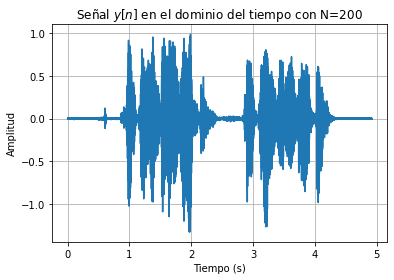

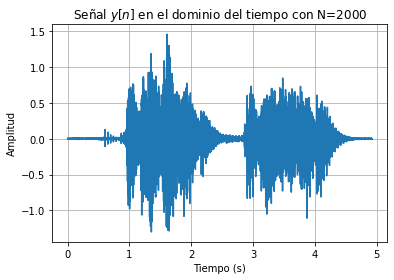

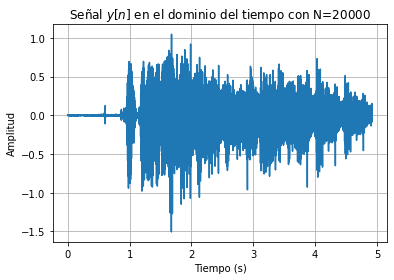

In [6]:
N1 = 200
N2 = 2000
N3 = 20000

salida1 = []
salida2 = []
salida3 = []

for n in range(len(s2)):
    prueba = y2(n, s2, b1, N1)
    salida1.append(prueba)

plt.plot(t, salida1)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title("Señal $y[n]$ en el dominio del tiempo con " + f"N={N1}")

for n in range(len(s2)):
    prueba = y2(n, s2, b1, N2)
    salida2.append(prueba)

plt.figure()
plt.plot(t, salida2)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title("Señal $y[n]$ en el dominio del tiempo con " + f"N={N2}")

for n in range(len(s2)):
    prueba = y2(n, s2, b1, N3)
    salida3.append(prueba)

plt.figure()
plt.plot(t, salida3)
plt.grid()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title("Señal $y[n]$ en el dominio del tiempo con " + f"N={N3}")

In [9]:
# Estas líneas solo se deben correr una vez, pues cada vez que se corren se genera un archivo .wav nuevo. Como con este
# cuaderno están adjuntos los audios generados, no es necesario volver a crear los archivos de audio.

# wavio.write("N200.wav", np.asarray(salida1), samprate2, sampwidth=2)
# wavio.write("N2000.wav", np.asarray(salida2), samprate2, sampwidth=2)
# wavio.write("N20000.wav", np.asarray(salida3), samprate2, sampwidth=2)

In [10]:
playsound('N200.wav')
playsound('N2000.wav')
playsound('N20000.wav')

Se puede notar que a medida que incrementa el valor de $N$, la frecuencia con la que se escucha el eco incrementa. También se escucha más robótica la voz.